## Limpieza de datos

In [27]:
import pandas as pd
import seaborn as sns

In [28]:
archivo = 'default of credit card clients.xls'
# Leer el archivo sin encabezados
df = pd.read_excel(archivo, header=None)

# Fusionar las dos primeras filas para crear el encabezado
new_header = df.iloc[0:2].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=0)

# Establecer el nuevo encabezado y eliminar las filas utilizadas para el encabezado
df = df[2:]  # Descarta las filas usadas para el encabezado
df.columns = new_header  # Establece el nuevo encabezado
#df = df.head(500)


In [29]:
# Se elimina las filas que contengan un -2 entre las columnas X6 a X11
valor_especifico=-2

for i in range(8,13):
    df = df.drop(df.loc[df.iloc[:, i] == valor_especifico].index)
    df.iloc[:, i].replace(-1, 0, inplace=True)

df


,ID,X1 LIMIT_BAL,X2 SEX,X3 EDUCATION,X4 MARRIAGE,X5 AGE,X6 PAY_0,X7 PAY_2,X8 PAY_3,X9 PAY_4,...,X15 BILL_AMT4,X16 BILL_AMT5,X17 BILL_AMT6,X18 PAY_AMT1,X19 PAY_AMT2,X20 PAY_AMT3,X21 PAY_AMT4,X22 PAY_AMT5,X23 PAY_AMT6,Y default payment next month
3,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
5,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
7,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29997,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29998,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29999,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
30000,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [30]:
filas=len(df)
for index, row in df.iterrows():
    numero_ceros = df['Y default payment next month'].value_counts()[0]
    numero_unos = df['Y default payment next month'].value_counts()[1]
    porc_ceros=numero_ceros/filas
    porc_unos=numero_unos/filas
    error=abs(porc_ceros-porc_unos)
    if error<0.00001:
        break
    elif row['Y default payment next month']==0:
        df.drop(index, inplace=True)
    filas=len(df)
        



In [32]:
for i in range(12, 18):
    df[f'RatioUso_{i}'] = df[f"X{i} BILL_AMT{i-11}"] / df["X1 LIMIT_BAL"] 
df

,ID,X1 LIMIT_BAL,X2 SEX,X3 EDUCATION,X4 MARRIAGE,X5 AGE,X6 PAY_0,X7 PAY_2,X8 PAY_3,X9 PAY_4,...,X21 PAY_AMT4,X22 PAY_AMT5,X23 PAY_AMT6,Y default payment next month,RatioUso_12,RatioUso_13,RatioUso_14,RatioUso_15,RatioUso_16,RatioUso_17
3,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,0.02235,0.014375,0.02235,0.027267,0.028792,0.027175
15,14,70000,1,2,2,30,1,2,2,0,...,3000,1500,0,1,0.940029,0.962414,0.938586,0.954029,0.516243,0.527057
18,17,20000,1,1,2,24,0,0,2,2,...,0,1650,0,1,0.7688,0.9005,0.8714,0.9169,0.89525,0.9552
23,22,120000,2,2,1,39,-1,-1,-1,-1,...,632,316,0,1,0.002633,0.002633,0.002633,0.0,0.005267,0.002633
24,23,70000,2,2,2,26,2,0,0,2,...,3601,0,1820,1,0.586957,0.606357,0.643143,0.628657,0.670071,0.657314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29997,29996,220000,1,3,1,39,0,0,0,0,...,3047,5000,1000,0,0.858855,0.876432,0.947114,0.400018,0.141986,0.072636
29998,29997,150000,1,3,2,43,-1,-1,-1,-1,...,129,0,0,0,0.01122,0.012187,0.023347,0.05986,0.0346,0.0
29999,29998,30000,1,2,2,37,4,3,2,-1,...,4200,2000,3100,1,0.118833,0.111867,0.091933,0.695933,0.686067,0.645233
30000,29999,80000,1,3,1,41,1,-1,0,0,...,1926,52964,1804,1,-0.020563,0.979738,0.9538,0.659675,0.148187,0.6118


<Axes: >

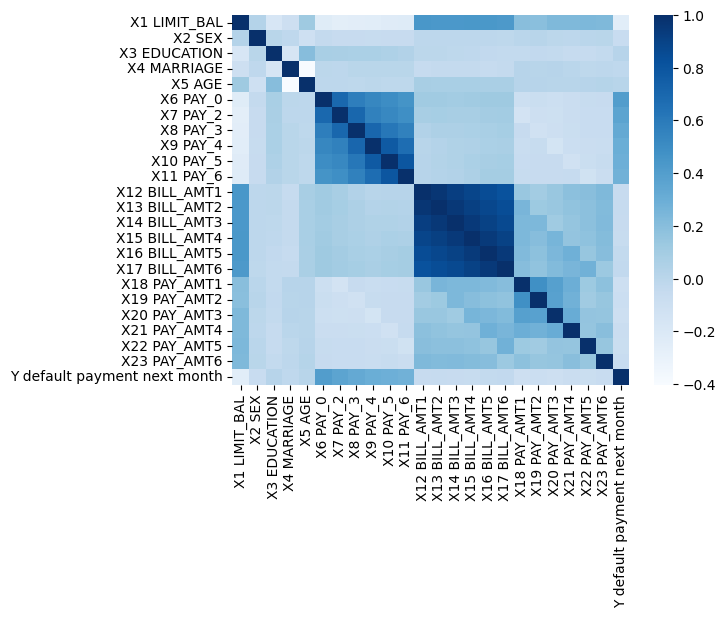

In [33]:
features=["X1 LIMIT_BAL", "X2 SEX", "X3 EDUCATION", "X4 MARRIAGE", "X5 AGE", "X6 PAY_0", "X7 PAY_2", "X8 PAY_3", "X9 PAY_4", "X10 PAY_5", "X11 PAY_6", "X12 BILL_AMT1", "X13 BILL_AMT2", "X14 BILL_AMT3", "X15 BILL_AMT4", "X16 BILL_AMT5", "X17 BILL_AMT6", "X18 PAY_AMT1", "X19 PAY_AMT2", "X20 PAY_AMT3", "X21 PAY_AMT4", "X22 PAY_AMT5", "X23 PAY_AMT6", "Y default payment next month"]
data_filtered=df[features]
corr = data_filtered.corr()
sns.heatmap(corr, cmap="Blues", annot=False)

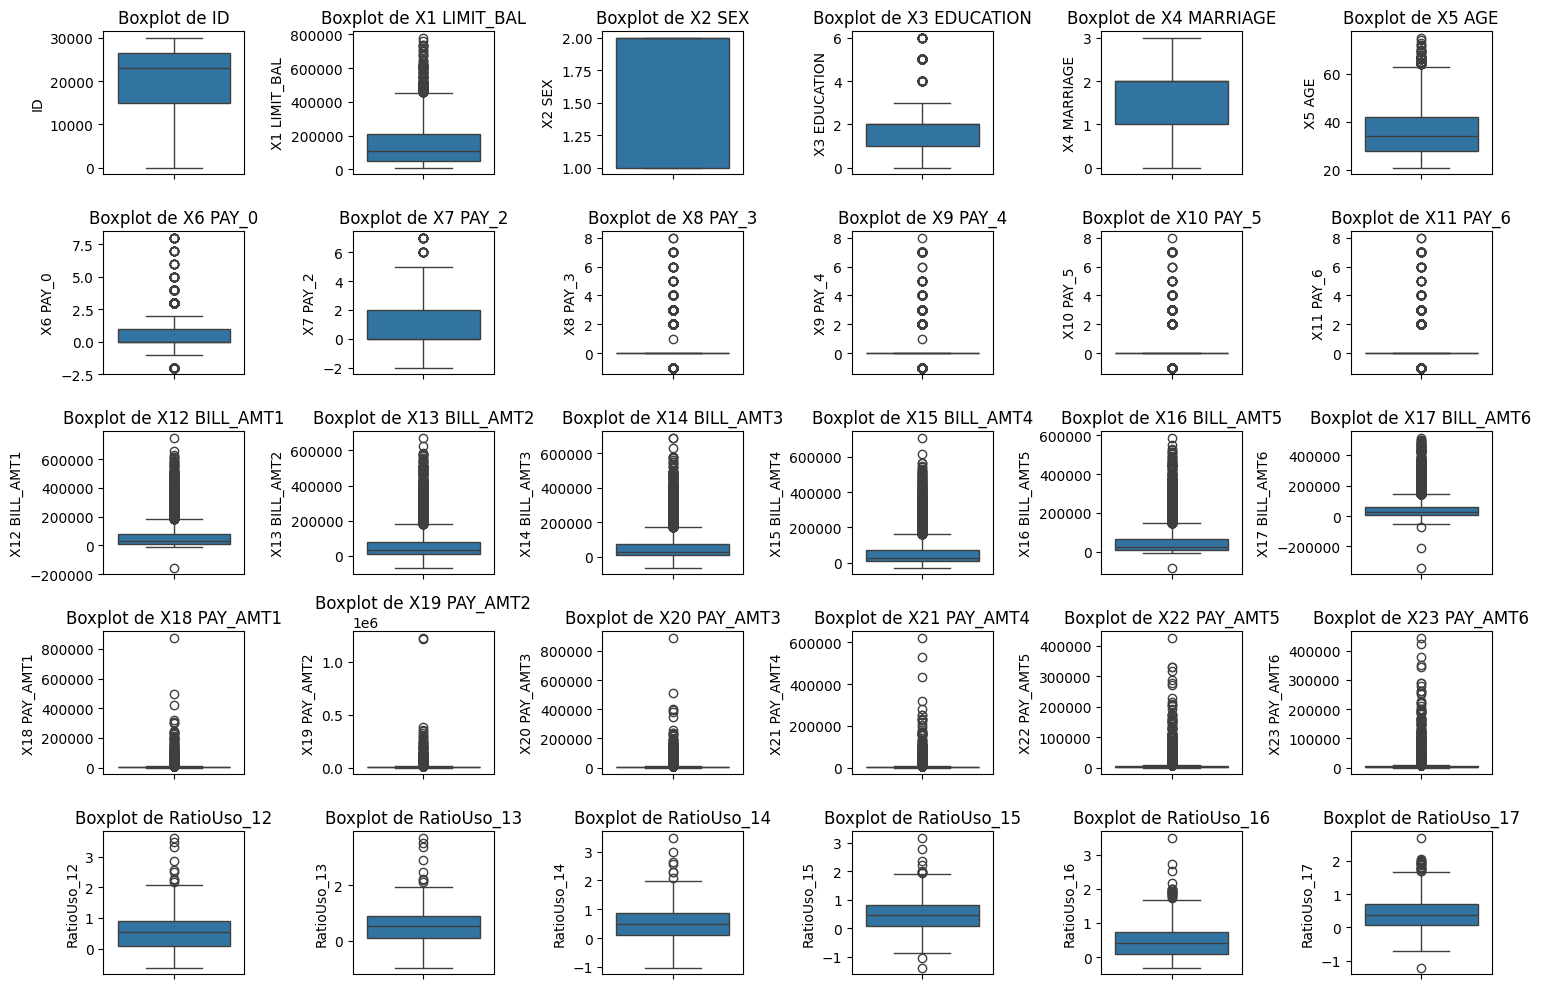

In [34]:
import matplotlib.pyplot as plt

# Definir las variables de entrada (todas except la variable objetivo)
variables_entrada = df.drop(columns=["Y default payment next month"])

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear un boxplot para cada variable de entrada
num_subplots = min(len(variables_entrada.columns), 30)
for i, columna in enumerate(variables_entrada.columns[:num_subplots]):
    plt.subplot(5, 6, i+1)
    sns.boxplot(y=columna, data=df)
    plt.title(f'Boxplot de {columna}')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar los boxplots
plt.show()

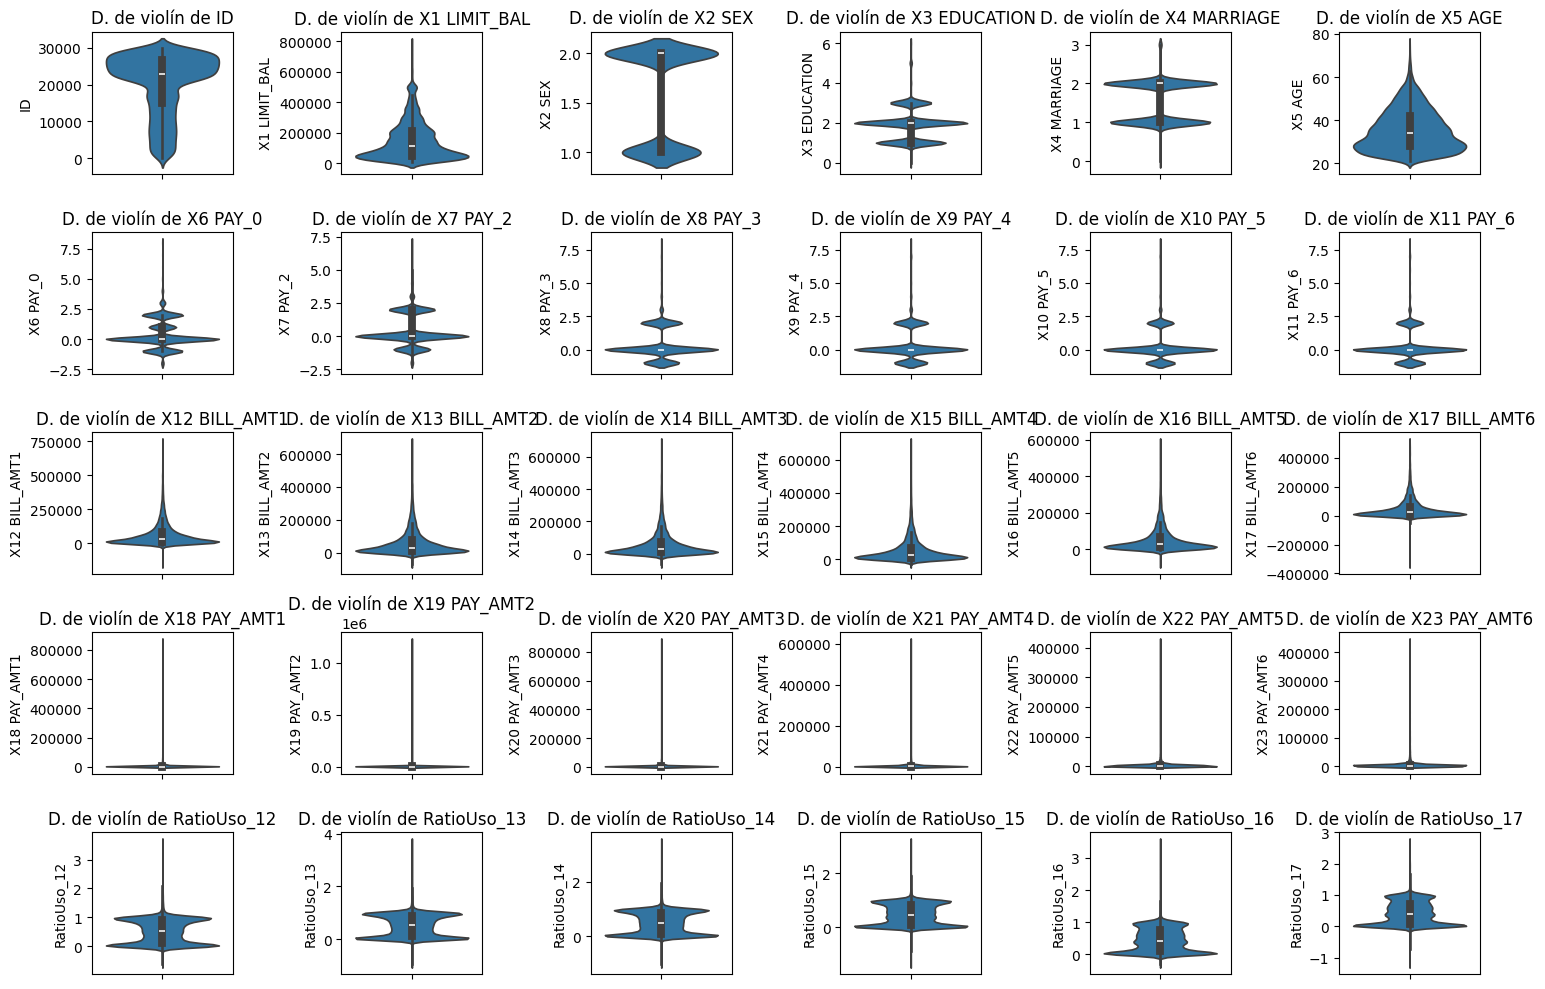

In [35]:
plt.figure(figsize=(15, 10))

# Crear un diagrama de violín para cada variable de entrada
num_subplots = min(len(variables_entrada.columns), 30)
for i, columna in enumerate(variables_entrada.columns[:num_subplots]):
    plt.subplot(5, 6, i+1)
    sns.violinplot(y=columna, data=df)
    plt.title(f'D. de violín de {columna}')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar los diagramas de violín
plt.show()

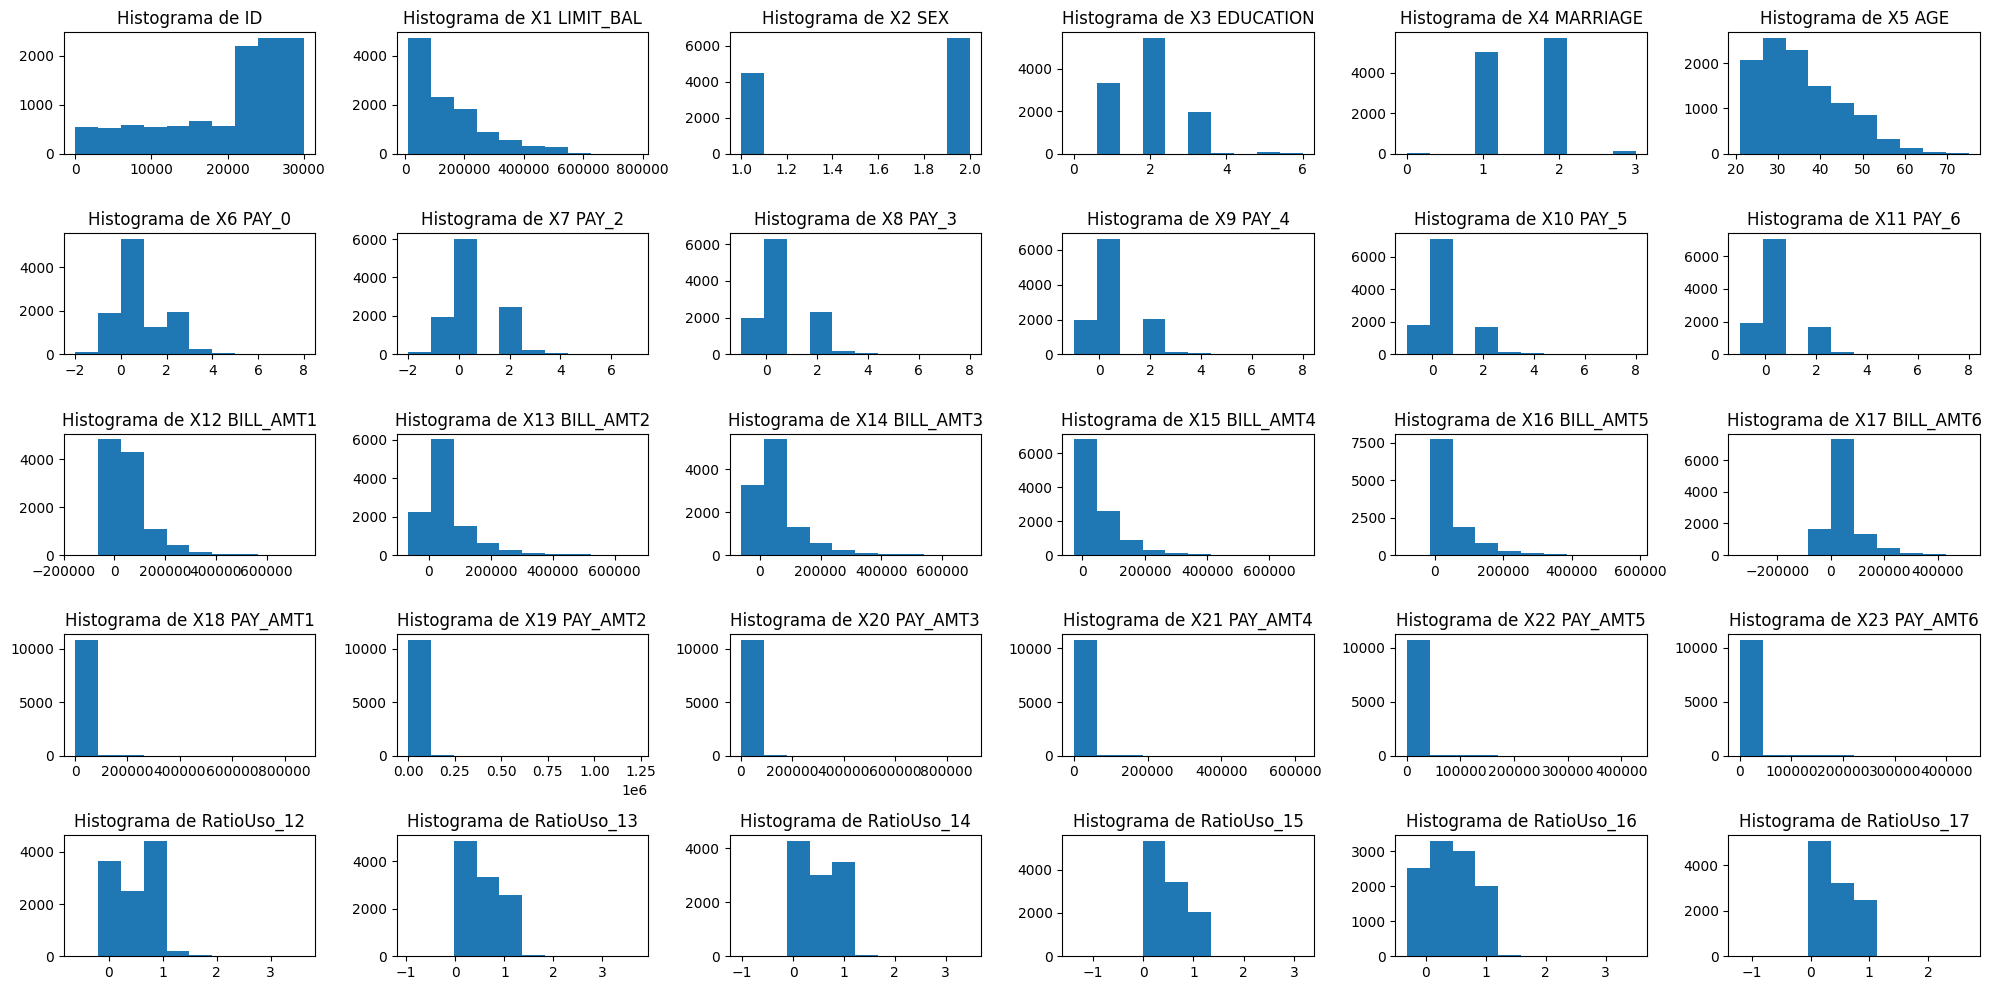

In [36]:
# Configurar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Crear un histograma para cada variable de entrada
num_subplots = min(len(variables_entrada.columns), 30)
for i, columna in enumerate(variables_entrada.columns[:num_subplots]):
    ax = plt.subplot(5, 6, i+1)
    df[columna].hist(ax=ax)
    ax.set_title(f'Histograma de {columna}')
    ax.grid(False)  # Eliminar grid


# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar los histogramas
plt.show()

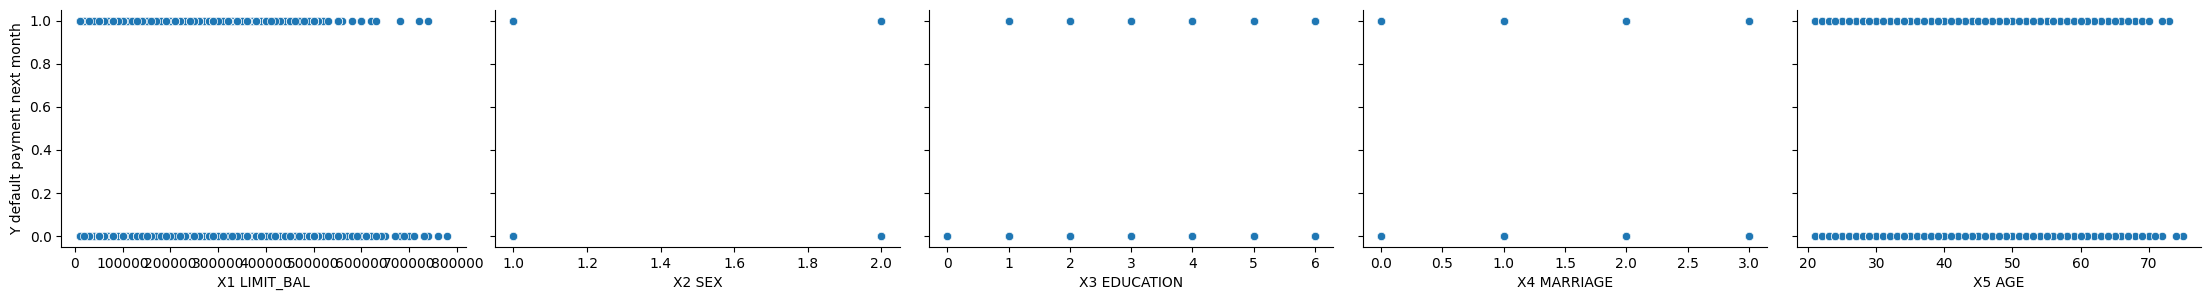

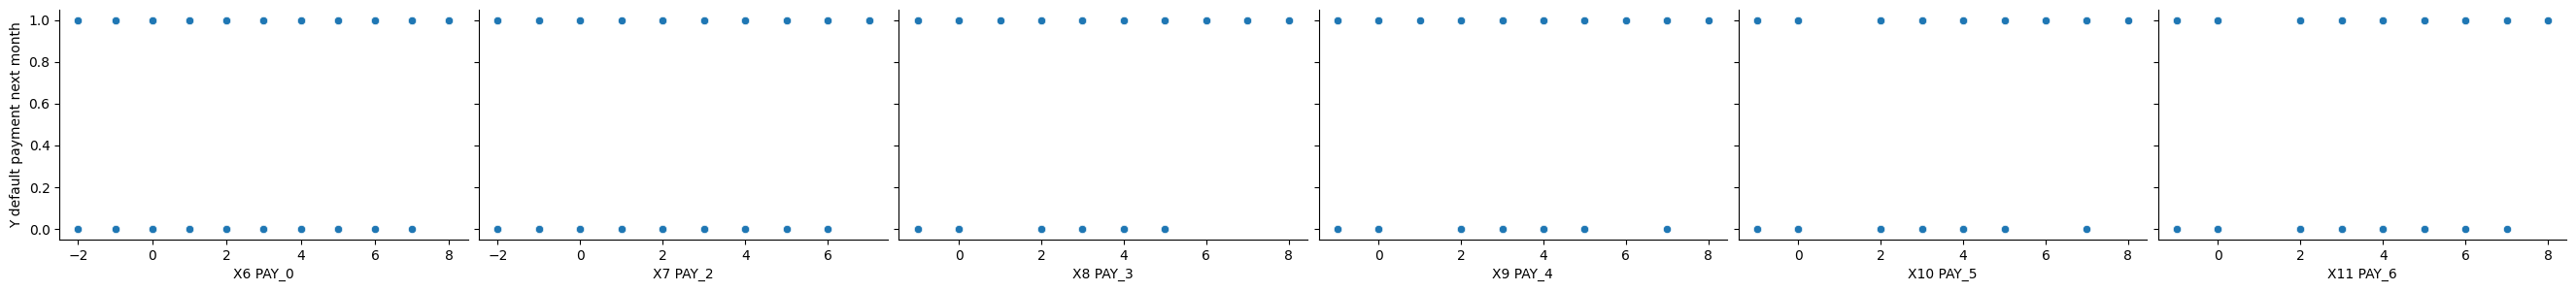

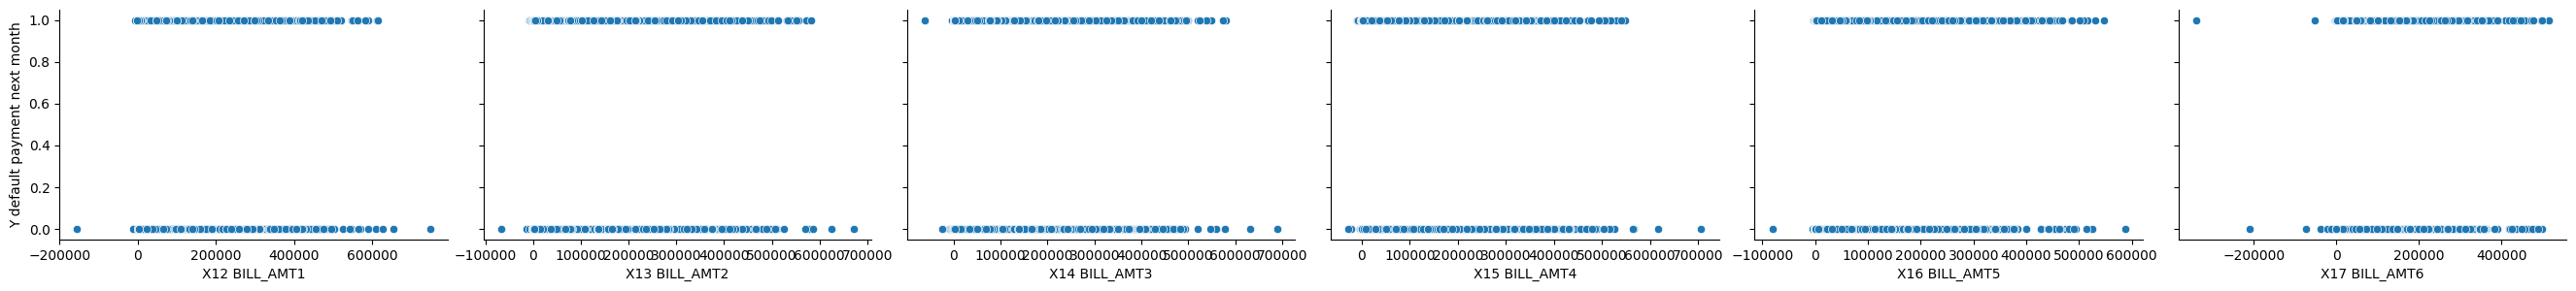

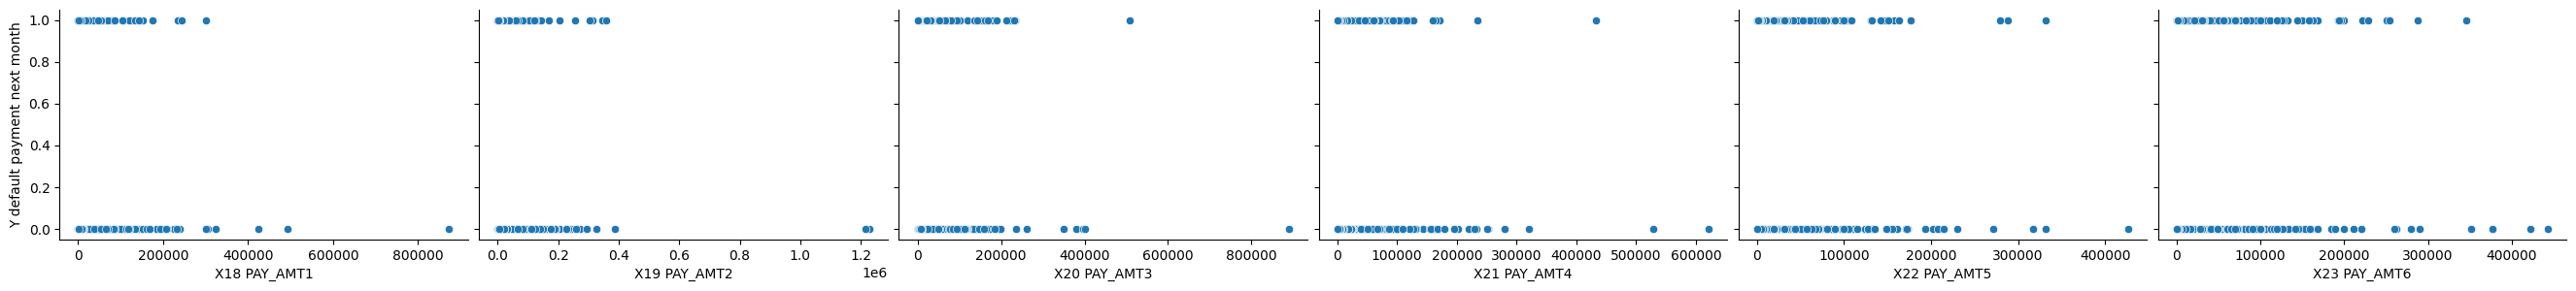

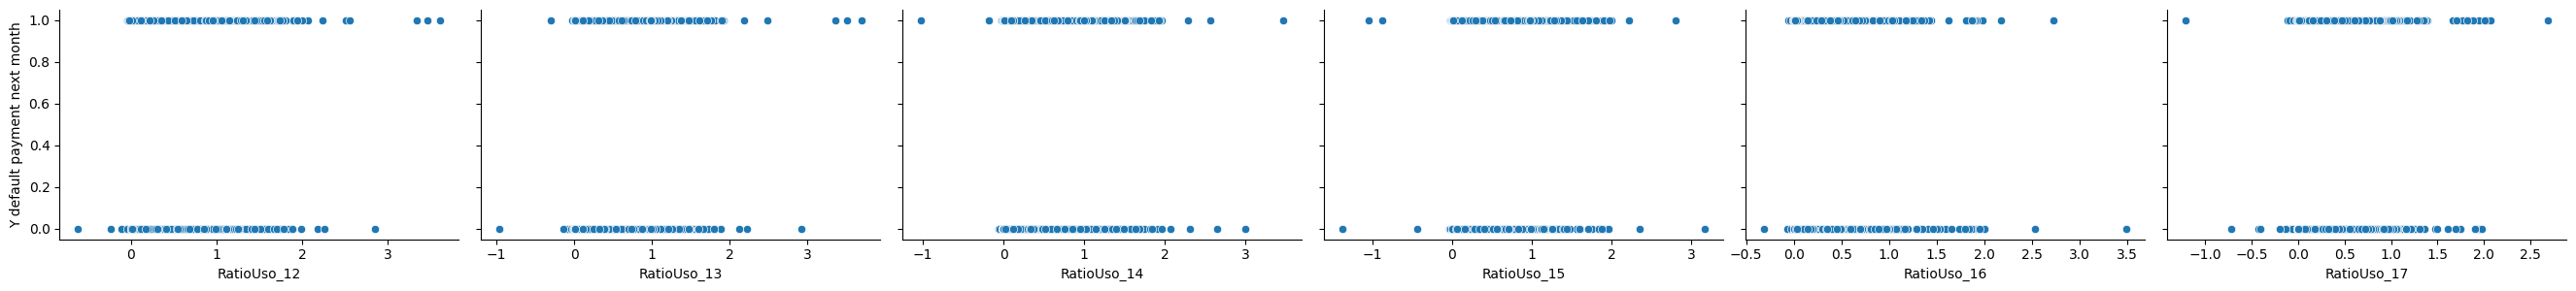

In [37]:
equis = ["X1 LIMIT_BAL", "X2 SEX", "X3 EDUCATION", "X4 MARRIAGE", "X5 AGE", "X6 PAY_0", "X7 PAY_2", "X8 PAY_3", "X9 PAY_4", "X10 PAY_5", "X11 PAY_6", "X12 BILL_AMT1", "X13 BILL_AMT2", "X14 BILL_AMT3", "X15 BILL_AMT4", "X16 BILL_AMT5", "X17 BILL_AMT6", "X18 PAY_AMT1", "X19 PAY_AMT2", "X20 PAY_AMT3", "X21 PAY_AMT4", "X22 PAY_AMT5", "X23 PAY_AMT6", "Y default payment next month"]
sns.pairplot(df, x_vars=["X1 LIMIT_BAL", "X2 SEX", "X3 EDUCATION", "X4 MARRIAGE", "X5 AGE"], y_vars="Y default payment next month", height=3, aspect=1.5)
sns.pairplot(df, x_vars=["X6 PAY_0", "X7 PAY_2", "X8 PAY_3", "X9 PAY_4", "X10 PAY_5", "X11 PAY_6"], y_vars="Y default payment next month", height=3, aspect=1.5)
sns.pairplot(df, x_vars=["X12 BILL_AMT1", "X13 BILL_AMT2", "X14 BILL_AMT3", "X15 BILL_AMT4", "X16 BILL_AMT5", "X17 BILL_AMT6"], y_vars="Y default payment next month", height=3, aspect=1.5)
sns.pairplot(df, x_vars=["X18 PAY_AMT1", "X19 PAY_AMT2", "X20 PAY_AMT3", "X21 PAY_AMT4", "X22 PAY_AMT5", "X23 PAY_AMT6"], y_vars="Y default payment next month", height=3, aspect=1.5)
sns.pairplot(df, x_vars=["RatioUso_12", "RatioUso_13", "RatioUso_14", "RatioUso_15", "RatioUso_16", "RatioUso_17"], y_vars="Y default payment next month", height=3, aspect=1.5)


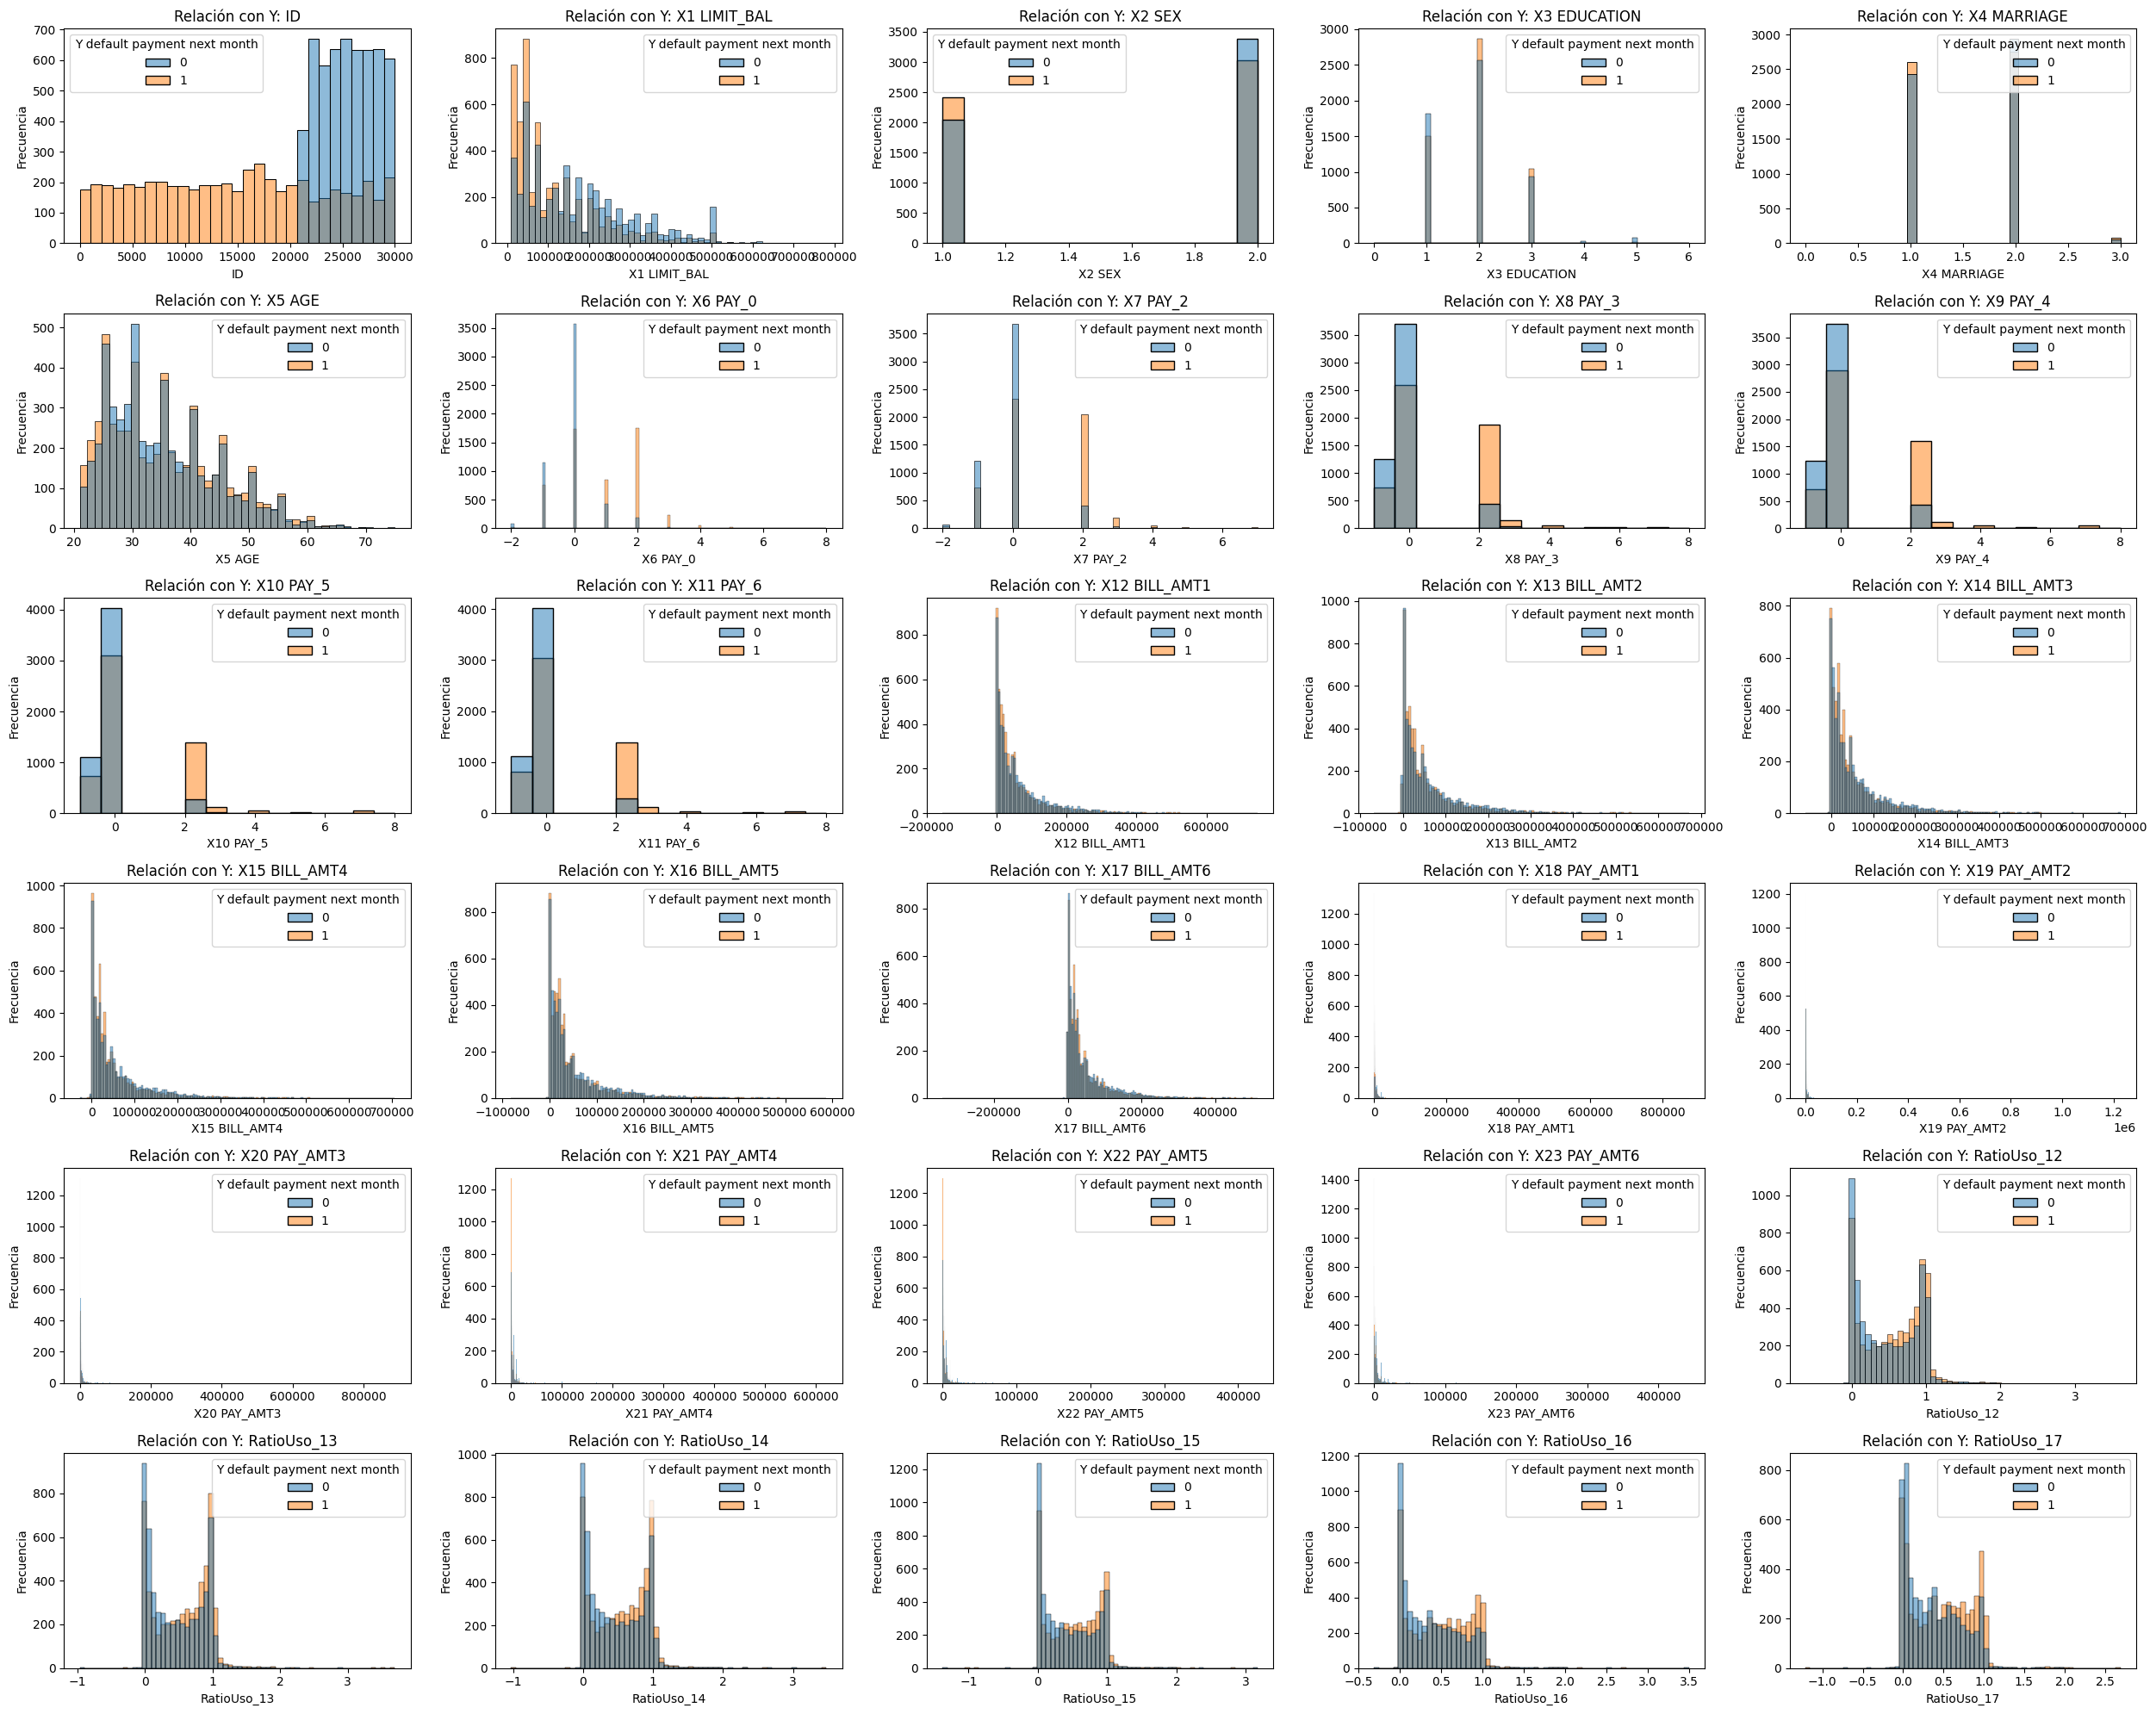

In [39]:
# Definir las variables de entrada (todas except la variable objetivo)
# variables_entrada2 = ["X1 LIMIT_BAL", "X2 SEX", "X3 EDUCATION", "X4 MARRIAGE", "X5 AGE", "X6 PAY_0", "X7 PAY_2", "X8 PAY_3", "X9 PAY_4", "X10 PAY_5", "X11 PAY_6", "X12 BILL_AMT1", "X13 BILL_AMT2", "X14 BILL_AMT3", "X15 BILL_AMT4", "X16 BILL_AMT5", "X17 BILL_AMT6"] # df.drop(columns=["Y default payment next month"])

# Configurar el tamaño de la figura
plt.figure(figsize=(25, 20))

# Crear una gráfica por cada variable de entrada
for i, columna in enumerate(variables_entrada):
    plt.subplot(6, 5, i+1)
    #if df[columna].dtype == 'O':
    # sns.countplot(x=columna, hue="Y default payment next month", data=df)
    #else:
    sns.histplot(x=columna, hue="Y default payment next month", data=df)
    plt.title(f'Relación con Y: {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()